In [1]:
import pandas as pd
import numpy as np

In [4]:
#Abnormal return
ar_url='https://raw.githubusercontent.com/ethancn01/10ksentimentalanalysis/main/Abnormal_return.xlsx'
ar=pd.read_excel(ar_url)

       CONFORMED PERIOD OF REPORT  FILE AS OF DATE  CENTRAL INDEX KEY  \
count                3.053000e+03     3.053000e+03       3.053000e+03   
mean                 2.014166e+07     2.014828e+07       8.245249e+05   
std                  5.986704e+04     5.979693e+04       4.597651e+05   
min                  1.999123e+07     2.000030e+07       1.800000e+03   
25%                  2.010053e+07     2.010081e+07       7.075490e+05   
50%                  2.015123e+07     2.016022e+07       9.106060e+05   
75%                  2.019123e+07     2.020022e+07       1.099800e+06   
max                  2.023073e+07     2.023093e+07       1.781335e+06   

           CAR(T0)      CAR(T1)      CAR(T3)      CAR(T5)     CAR(T10)  \
count  3053.000000  3053.000000  3053.000000  3053.000000  3053.000000   
mean      0.000490     0.000679     0.000264    -0.000110    -0.002737   
std       0.028904     0.037314     0.049908     0.055459     0.070532   
min      -0.546284    -0.643997    -0.706606  

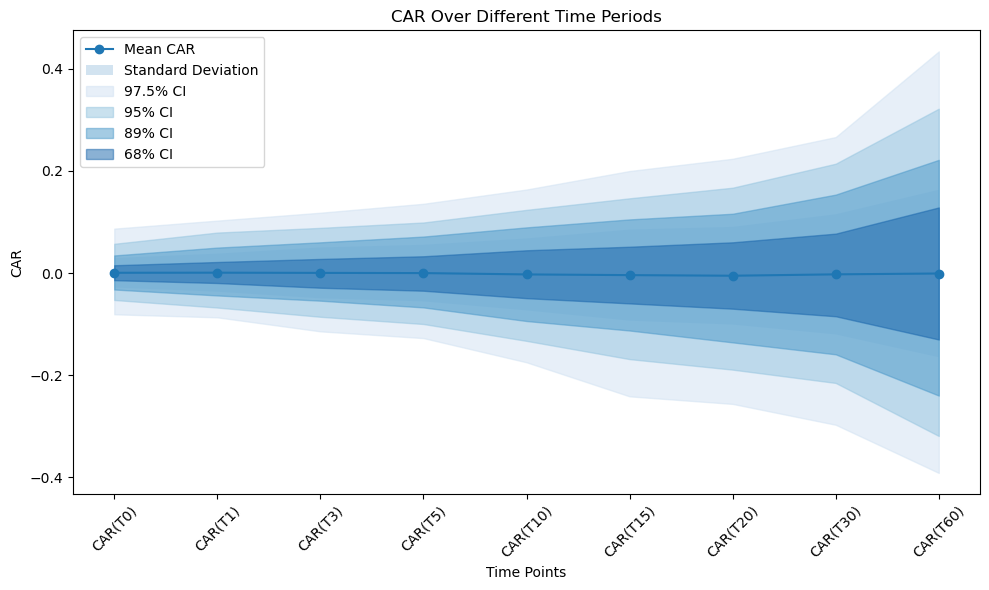

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


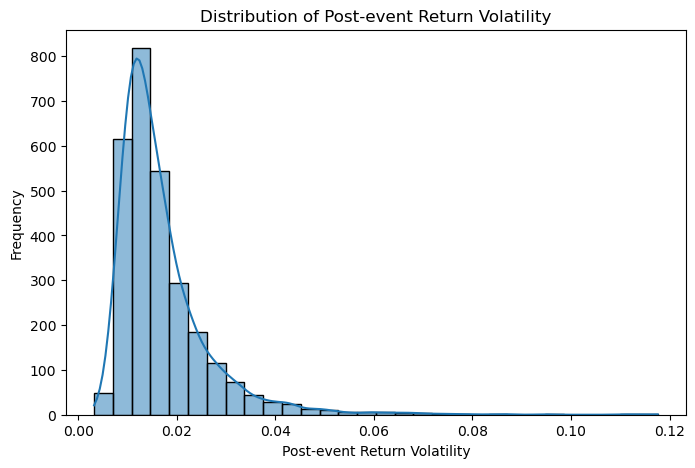

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# describe
print(ar.describe())

# Generate colors
colors = sns.color_palette("Blues", 4)  # Generate a palette of 4 blues

# CAR trend draw
plt.figure(figsize=(10, 6))
time_points = ['CAR(T0)', 'CAR(T1)', 'CAR(T3)', 'CAR(T5)', 'CAR(T10)', 'CAR(T15)', 'CAR(T20)', 'CAR(T30)', 'CAR(T60)']
means = ar[time_points].mean()
std_devs = ar[time_points].std()

plt.plot(means, marker='o', linestyle='-', label='Mean CAR')
plt.fill_between(range(len(time_points)), means-std_devs, means+std_devs, alpha=0.2, label='Standard Deviation')

# Adding shades for different percentiles
percentiles = [(97.5, colors[0]), (95, colors[1]), (89, colors[2]), (68, colors[3])]  
for percentile, shade_color in percentiles:
    lower_bound = np.percentile(ar[time_points], (100 - percentile) / 2, axis=0)
    upper_bound = np.percentile(ar[time_points], 100 - (100 - percentile) / 2, axis=0)
    plt.fill_between(range(len(time_points)), lower_bound, upper_bound, alpha=0.5, color=shade_color, label=f'{percentile}% CI')

plt.xticks(range(len(time_points)), time_points, rotation=45)
plt.xlabel('Time Points')
plt.ylabel('CAR')
plt.title('CAR Over Different Time Periods')
plt.legend()
plt.tight_layout()
plt.legend(loc='upper left') 
plt.show()

# postevent volatility distribution
plt.figure(figsize=(8, 5))
sns.histplot(ar['Postevent return volatility'], kde=True, bins=30)
plt.title('Distribution of Post-event Return Volatility')
plt.xlabel('Post-event Return Volatility')
plt.ylabel('Frequency')
plt.show()


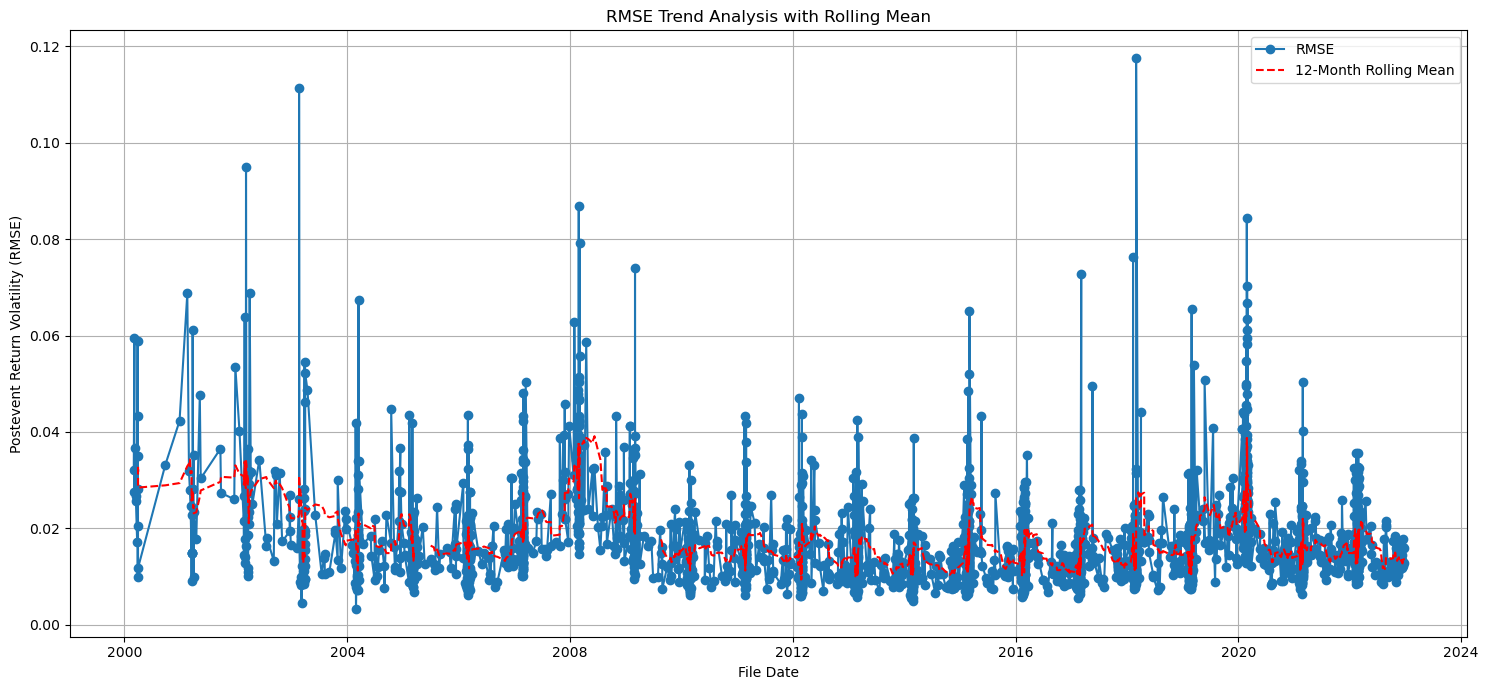

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read your data into a DataFrame if it's in a CSV or similar
# Since I don't have access to your data, I'll assume it's already loaded into a DataFrame named 'ar'

# Convert 'FILE AS OF DATE' to datetime format for plotting
ar['FILE AS OF DATE'] = pd.to_datetime(ar['FILE AS OF DATE'], format='%Y%m%d')

# Sort DataFrame by the 'FILE AS OF DATE'
ar.sort_values('FILE AS OF DATE', inplace=True)

# Calculate the rolling mean with a window of your choice, let's say 12 months for this example
window_size = 12
ar['Rolling Mean'] = ar['Postevent return volatility'].rolling(window=window_size).mean()

# Plotting the RMSE and Rolling Mean
plt.figure(figsize=(15, 7))
plt.plot(ar['FILE AS OF DATE'], ar['Postevent return volatility'], label='RMSE', marker='o')
plt.plot(ar['FILE AS OF DATE'], ar['Rolling Mean'], label='12-Month Rolling Mean', linestyle='--', color='r')
plt.title('RMSE Trend Analysis with Rolling Mean')
plt.xlabel('File Date')
plt.ylabel('Postevent Return Volatility (RMSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


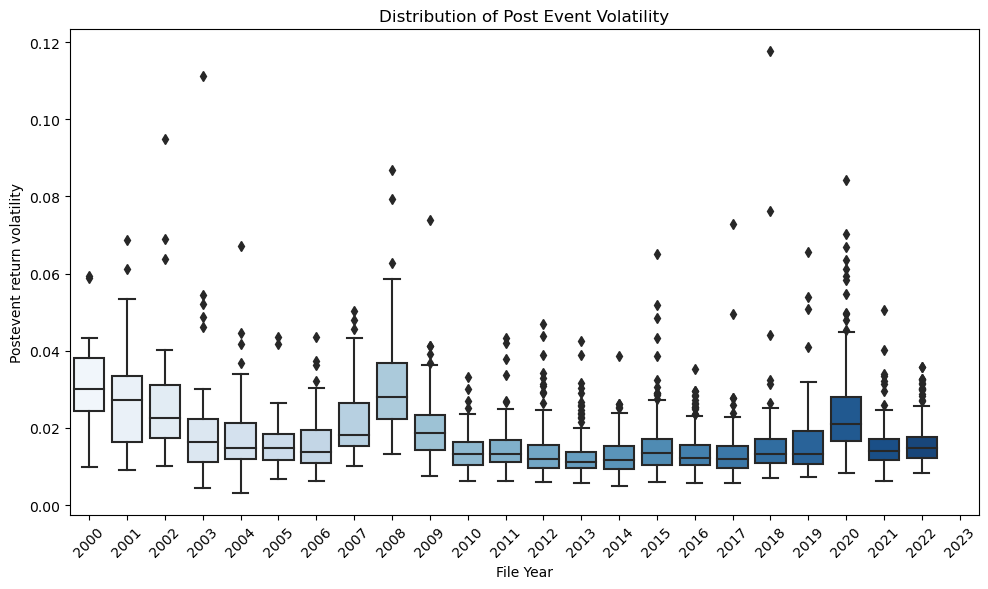

In [8]:
#plot ar
ar['File Year'] = ar['FILE AS OF DATE'].astype(str).str[:4]
ar['File Year'] = ar['File Year'].astype(int)
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='File Year', y='Postevent return volatility', data=ar, palette='Blues')
plt.xlabel('File Year')
plt.ylabel('Postevent return volatility')
plt.title('Distribution of Post Event Volatility')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

